In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [36]:
from sklearn import datasets
# LinearSVC no admite puntos dentro de la frontera de los vectores de soporte, c = ~infinito
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# separacion de los datos
from sklearn.model_selection import train_test_split
# metrics to evaluate the models
from sklearn import metrics

In [11]:
data_iris = datasets.load_iris()
data_iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
data_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
# limitar el dataset a 2 caracteristicas y solo 2 clases (100 primeros registros)
# primeros 100 rows, 2 columnas
caracteristicas = data_iris.data[:100,:2]
caracteristicas.shape

(100, 2)

In [21]:
# primeras 100 etiquetas
etiquetas = data_iris.target[:100]
etiquetas.shape

(100,)

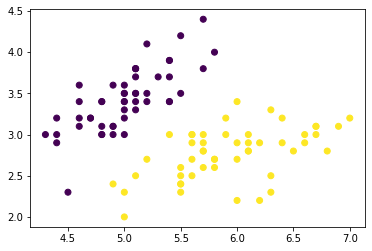

In [22]:
# visualizar los datos para ver si cumplen con las condiciones necesarias
# deben verse conjuntos separados lo suficiente para usar LinearSVM
plt.scatter(caracteristicas[:,0], caracteristicas[:,1], c=etiquetas)

In [25]:
# preprocesado de los datos para re escalar los datos
scaler = StandardScaler()
# normalizacion de los datos de las caracteristicas
caracteristicas_normalizadas = scaler.fit_transform(caracteristicas)


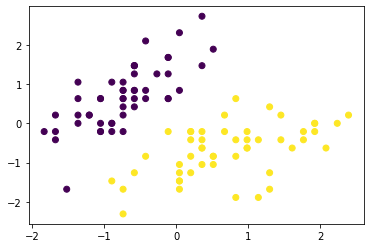

In [27]:
# visualizacion de los datos normalizados, es la misma grafica pero en otra escala
plt.scatter(caracteristicas_normalizadas[:,0], caracteristicas_normalizadas[:,1], c=etiquetas)

In [32]:
# separacion de los datos en train y test

X_train, X_test, y_train, y_test = train_test_split(caracteristicas_normalizadas, etiquetas, test_size=0.2)

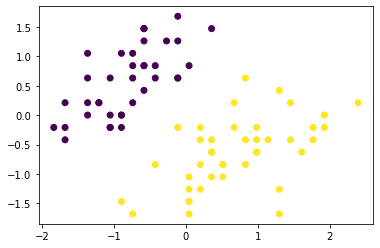

In [33]:
# visualizacion de los datos de X_train
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [29]:
# creacion del modelo
# C = hiperparametro
SVC = LinearSVC(C=1)

In [34]:
# entrenamiento del modelo
modelo_entrenado = SVC.fit(X_train, y_train)

In [35]:
# prediccion
y_predict = SVC.predict(X_test)
y_predict

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [38]:
# evaluacion del modelo
def EvaluacionModelo(y_test, y_pred):
    pre_s = metrics.precision_score(y_test, y_pred, average='micro')
    rec_s = metrics.recall_score(y_test, y_pred, average='micro')
    f1_s = metrics.f1_score(y_test, y_pred, average='micro')
    accu_s = metrics.accuracy_score(y_test, y_pred)
    return (pre_s, rec_s, f1_s, accu_s)

In [39]:
precision, recall, f1, accuracy = EvaluacionModelo(y_test, y_predict)
print(f"Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")

Precision: 0.95, Recall: 0.95, F1: 0.9500000000000001, Accuracy: 0.95


In [41]:
# matriz de confusion
metrics.confusion_matrix(y_test, y_predict)

array([[11,  1],
       [ 0,  8]], dtype=int64)

In [42]:
# plotear el modelo entrenado, el hiperplano y los vectores de soporte